<a href="https://colab.research.google.com/github/aafreen2212/DL/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

Read the data

In [ ]:
header = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", names=header)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Find null values

In [ ]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Replace question marks with null values

In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Handling missing data

In [ ]:
#drop rows with null price values
data = data.dropna(subset=['price'])

In [ ]:
#Impute the null values with mean or mode
to_impute = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
data[to_impute] = data[to_impute].astype('float64')
data[to_impute] = data[to_impute].fillna(data[to_impute].mean())
data[to_impute].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

Reset index

In [ ]:
data.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


Find the datatype of each column

In [ ]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert suitable columns into int and float datatypes

In [ ]:
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")

In [ ]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Convert mpg into L/100km

In [ ]:
data['city_L/100km'] = 235/data["city-mpg"]
data['highway_L/100km'] = 235/data['highway-mpg']


Normalizing length, width and height

In [ ]:
# replace (original value) by (original value)/(maximum value)
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

Creating horsepower histogram

In [ ]:
data['horsepower']=data['horsepower'].astype(int, copy=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'horsepower bins')

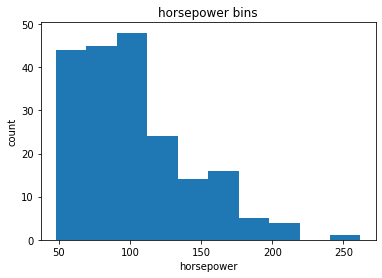

In [ ]:
plt.hist(data["horsepower"])
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Histogram bins for each group on horsepower

In [ ]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
print(bins)

[ 48.         119.33333333 190.66666667 262.        ]


In [ ]:
groups = ['Low', 'Medium', 'High']

In [ ]:
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=groups, include_lowest=True )

data['horsepower-binned'].head(5)

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: category
Categories (3, object): [Low < Medium < High]

In [ ]:
data["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower-binned')

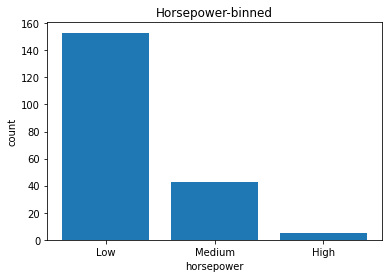

In [ ]:

plt.bar(groups, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower-binned")

Dummy variables for fuel type and aspiration columns

In [ ]:
dummy_variable = pd.get_dummies(data["fuel-type"])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df" and "dummy_variable_1" 
data = pd.concat([data, dummy_variable], axis=1)

# drop original column "fuel-type" from "df"
data.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
dummy_aspiration =  pd.get_dummies(data["aspiration"])
dummy_aspiration.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
dummy_aspiration.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)
dummy_aspiration.head()

,aspiration-type-std,aspiration-type-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
